In [92]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import gmaps
from pytrends.request import TrendReq
from pprint import pprint
import string

# Import API key
from config import nyt_api_key
from config import gkey

## Generate Top Query List

In [113]:
type_list = [#"Arts", 
             #"Automobiles", 
             #"Blogs", 
             #"Books", 
             "Business Day", 
             #"Education", 
             #"Fashion & Style", 
             #"Food", 
             #"Health", 
             #"Job Market", 
             #"Magazine", 
             #"membercenter", 
             #"Movies", 
             "Multimedia", 
             "N.Y.%20%2F%20Region", 
             "NYT Now",  
             #"Open", 
             #"Opinion", 
             #"Public Editor", 
             #"Real Estate", 
             #"Science", 
             #"Sports", 
             #"Style", 
             "Sunday Review", 
             #"T Magazine", 
             #"Technology", 
             #"The Upshot", 
             #"Theater", 
             #"Times Insider", 
             "Today’s Paper", 
             #"Travel", 
             "U.S.", 
             "World", 
             #"Your Money"
]

# Initialize empty list to hold description facets
facets = []

# Loop through each type
for type in type_list:
    # Starting URL for NYT Most Shared API Call - Facebook
    url = f"http://api.nytimes.com/svc/mostpopular/v2/mostshared/{type}/facebook/30.json?"
    query_url = f"{url}api-key={nyt_api_key}"
    response = requests.get(query_url).json()

    # Loop through the list of articles, remove common punctuation, and perform a split
    for result in range(len(response['results'])):
        text = response['results'][result]['org_facet']
        for facet in text:
            facets.append(facet.lower())
            #print(facets)

In [120]:
# Create DataFrame with the top 5 (by value count) queries
facet_df=pd.DataFrame(facets).rename(columns={0:"Number of Appearances"})
top_queries = pd.DataFrame(facet_df['Number of Appearances'].value_counts()).head(20)
top_queries_reset = top_queries.reset_index()
top_queries_rnm = top_queries_reset.rename(columns={"index":"Facet"})
top_queries_rnm

,Facet,Number of Appearances
0,justice department,3
1,islamic state in iraq and syria (isis),3
2,frauds and swindling,2
3,sex crimes,2
4,immigration and emigration,2
5,espionage and intelligence services,2
6,presidential election of 2016,2
7,roman catholic church,2
8,education department (us),2
9,suits and litigation (civil),2


In [111]:
# Construct keyword list for Google Trends
query_list = top_queries_rnm["Facet"].head()

# Configure Google Trends
pytrends = TrendReq(hl='en-US', tz=360)

# Add the keyword list in 
pytrends.build_payload(query_list, cat=0, timeframe='2017-09-07 2018-09-07', geo='US',gprop='')
    
data_list = pytrends.interest_by_region(resolution='STATE')

data_list1 = data_list.loc[(data_list!=0).any(1)]
data_list1 = data_list1.reset_index()
data_list1['lat'] = ''
data_list1['lng'] = ''
data_list1

,geoName,justice department,islamic state in iraq and syria (isis),frauds and swindling,sex crimes,immigration and emigration,lat,lng
0,Alabama,100,0,0,0,0,,
1,Alaska,100,0,0,0,0,,
2,Arizona,87,0,0,13,0,,
3,Arkansas,100,0,0,0,0,,
4,California,90,0,0,8,2,,
5,Colorado,91,0,0,9,0,,
6,Connecticut,100,0,0,0,0,,
7,Delaware,100,0,0,0,0,,
8,District of Columbia,100,0,0,0,0,,
9,Florida,87,0,0,9,4,,


In [115]:
lat = []
lng = []
for city in data_list1['geoName']:
    target_url = ('https://maps.googleapis.com/maps/api/geocode/json?'
    'address={0}&key={1}').format(city, gkey)
    geo_data = requests.get(target_url).json()
    lati = geo_data['results'][0]['geometry']['location']['lat']
    lngi = geo_data['results'][0]['geometry']['location']['lng']
    lat.append(lati)
    lng.append(lngi)

In [116]:
data_list1['lat'] = lat
data_list1['lng'] = lng
data_list1.head()

,geoName,justice department,islamic state in iraq and syria (isis),frauds and swindling,sex crimes,immigration and emigration,lat,lng
0,Alabama,100,0,0,0,0,32.318231,-86.902298
1,Alaska,100,0,0,0,0,64.200841,-149.493673
2,Arizona,87,0,0,13,0,34.048928,-111.093731
3,Arkansas,100,0,0,0,0,35.201050,-91.831833
4,California,90,0,0,8,2,36.778261,-119.417932


In [117]:
locations = data_list1[['lat','lng']].astype(float)
query_request = data_list1['justice department'].astype(float)

In [118]:
gmaps.configure(api_key = gkey)

In [100]:
# Construct heat map for the query_request
fig = gmaps.figure(map_type="HYBRID")
heat_layer = gmaps.heatmap_layer(locations, weights=query_request,
                                dissipating=False, max_intensity=100, point_radius = 1)
heat_layer.dissipating = False
heat_layer.max_intensity = 100
heat_layer.point_radius = 1
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [101]:
pytrends.related_queries()

{'justice department': {'top':                                    query  value
  0                  department of justice    100
  1                       criminal justice     28
  2            criminal justice department     28
  3                 the justice department     24
  4         department of criminal justice     22
  5                       texas department     21
  6              the department of justice     20
  7            texas department of justice     19
  8      texas department criminal justice     18
  9   texas department of criminal justice     17
  10                 us justice department      9
  11              us department of justice      9
  12           juvenile justice department      8
  13                      state department      7
  14                   department of state      7
  15             justice police department      7
  16        department of juvenile justice      6
  17      department of justice california      6
  18      united stat

In [105]:
# Construct bar graph for the related queries
related_query = pytrends.related_queries()
related_query_df = related_query['justice department']['rising']
related_query_df

,query,value
0,bruce ohr department of justice,14400
1,texas department of transportation,8500
2,deep state justice department,2700
3,rachel brand justice department,1000
4,tarrant county jail,300
5,justice department resignation,300
6,california department of justice firearms,170
7,virginia department of criminal justice services,170
8,department of commerce,140
9,tdcj inmate search,140


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text xticklabel objects>)

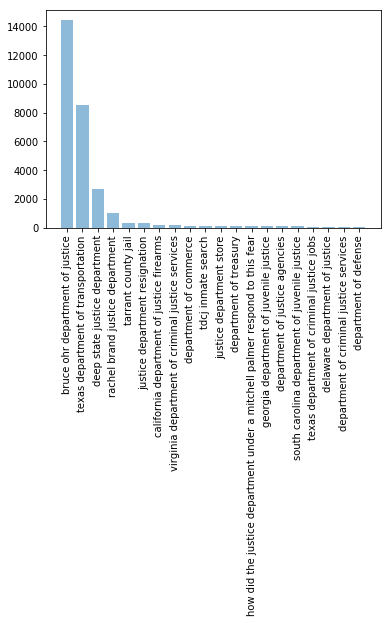

In [106]:
plt.bar(related_query_df['query'],related_query_df['value'],alpha=0.5, align="center")
plt.xticks(rotation=90)

In [107]:
pytrends.trending_searches(pn='p1')

,date,exploreUrl,formattedTraffic,hotnessColor,hotnessLevel,imgLinkUrl,imgSource,imgUrl,newsArticlesList,relatedSearchesList,safe,shareUrl,startTime,title,titleLinkUrl,trafficBucketLowerBound
0,20180907,/trends/explore?q=Florence&date=now+7-d&geo=US,"100,000+",#e68033,3.0,http://www.foxnews.com/us/2018/09/08/nc-govern...,Fox News,//encrypted-tbn3.gstatic.com/images?q=tbn:ANd9...,[{'title': 'Tropical Storm <b>Florence</b> pro...,"[{'query': 'Tropical Storm Florence', 'safe': ...",1.0,https://www.google.com/trends/hottrends?stt=Fl...,1.536408e+09,Florence,//www.google.com/search?q=Florence,100000.0
1,20180907,/trends/explore?q=Priyanka+Chopra&date=now+7-d...,"100,000+",#e68033,3.0,http://www.vulture.com/2018/09/nick-jonas-hate...,Vulture,//encrypted-tbn3.gstatic.com/images?q=tbn:ANd9...,[{'title': '<b>Priyanka Chopra&#39;s</b> Favor...,"[{'query': 'Nick Jonas', 'safe': True}]",1.0,https://www.google.com/trends/hottrends?stt=Pr...,1.536412e+09,Priyanka Chopra,//www.google.com/search?q=Priyanka+Chopra,100000.0
2,20180907,/trends/explore?q=Bill+Daily&date=now+7-d&geo=US,"50,000+",#f0a049,2.0,https://www.usatoday.com/story/life/people/201...,USA TODAY,//encrypted-tbn1.gstatic.com/images?q=tbn:ANd9...,"[{'title': '<b>Bill Daily</b>, &#39;I Dream of...",[],1.0,https://www.google.com/trends/hottrends?stt=Bi...,1.536415e+09,Bill Daily,//www.google.com/search?q=Bill+Daily,50000.0
3,20180907,/trends/explore?q=George+Zimmerman&date=now+7-...,"50,000+",#f0a049,2.0,https://thegrapevine.theroot.com/walking-pile-...,The Root,//encrypted-tbn1.gstatic.com/images?q=tbn:ANd9...,[{'title': 'Walking Pile of Fecal Matter <b>Ge...,[],1.0,https://www.google.com/trends/hottrends?stt=Ge...,1.536422e+09,George Zimmerman,//www.google.com/search?q=George+Zimmerman,50000.0
4,20180907,/trends/explore?q=Mac+Miller&date=now+7-d&geo=US,"10,000,000+",#d04108,5.0,https://www.rollingstone.com/music/music-news/...,Rolling Stone,//encrypted-tbn2.gstatic.com/images?q=tbn:ANd9...,"[{'title': '<b>Mac Miller</b>: Drake, Chance t...","[{'query': 'Ariana Grande', 'safe': True}, {'q...",1.0,https://www.google.com/trends/hottrends?stt=Ma...,1.536354e+09,Mac Miller,//www.google.com/search?q=Mac+Miller,10000000.0
5,20180907,/trends/explore?q=Cardi+B&date=now+7-d&geo=US,"1,000,000+",#db601e,4.0,https://www.usatoday.com/story/life/people/201...,USA TODAY,//encrypted-tbn0.gstatic.com/images?q=tbn:ANd9...,[{'title': '<b>Cardi B</b> injured after fight...,"[{'query': 'Nicki Minaj', 'safe': True}, {'que...",1.0,https://www.google.com/trends/hottrends?stt=Ca...,1.536383e+09,Cardi B,//www.google.com/search?q=Cardi+B,1000000.0
6,20180907,/trends/explore?q=Elon+Musk&date=now+7-d&geo=US,"1,000,000+",#db601e,4.0,https://money.cnn.com/2018/09/08/news/companie...,CNNMoney,//encrypted-tbn2.gstatic.com/images?q=tbn:ANd9...,[{'title': 'Analysis: <b>Elon Musk</b> is hurt...,"[{'query': 'Tesla stock', 'safe': True}, {'que...",1.0,https://www.google.com/trends/hottrends?stt=El...,1.536329e+09,Elon Musk,//www.google.com/search?q=Elon+Musk,1000000.0
7,20180907,/trends/explore?q=mac+miller+ariana+grande&dat...,"500,000+",#db601e,4.0,http://www.t13.cl/noticia/tendencias/la-medida...,Teletrece,//encrypted-tbn2.gstatic.com/images?q=tbn:ANd9...,[{'title': 'La medida que debió tomar <b>Arian...,"[{'query': 'Ariana Grande Mac Miller', 'safe':...",1.0,https://www.google.com/trends/hottrends?stt=Ma...,1.536354e+09,Mac Miller Ariana Grande,//www.google.com/search?q=Mac+Miller+Ariana+Gr...,500000.0
8,20180907,/trends/explore?q=sierra+burgess+is+a+big+lose...,"200,000+",#e68033,3.0,https://www.vox.com/culture/2018/9/7/17830300/...,Vox,//encrypted-tbn2.gstatic.com/images?q=tbn:ANd9...,[{'title': 'Peter Kavinsky and Barb from Stran...,"[{'query': 'Shannon Purser', 'safe': True}, {'...",1.0,https://www.google.com/trends/hottrends?stt=Si...,1.536340e+09,Sierra Burgess Is A Big Loser,//www.google.com/search?q=Sierra+Burgess+Is+A+...,200000.0
9,20180907,/trends/explore?q=mexico+vs+uruguay&date=now+7...,"200,000+",#e

In [108]:
# Display interest over time
overtime_interest = pytrends.interest_over_time()
overtime_interest.head()

,justice department,islamic state in iraq and syria (isis),frauds and swindling,sex crimes,immigration and emigration,isPartial
date,,,,,,
2017-09-10,67,0,0,9,2,False
2017-09-17,76,0,0,7,3,False
2017-09-24,79,0,0,11,4,False
2017-10-01,74,0,0,10,4,False
2017-10-08,71,0,0,11,4,False


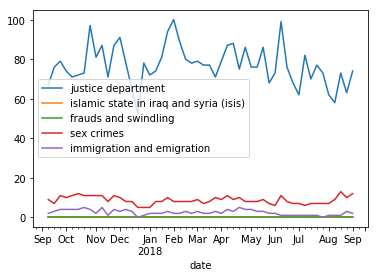

In [104]:
# Show trend line for given trend
lines  =  overtime_interest.plot.line()